In [1]:
%run './libraries/mpc/do_mpc_one_input_main.ipynb'
%run './libraries/utils/data_manipulation_one_input.ipynb'


## Control loop
Control loop for the deterministic model.

In [2]:
setup_mpc = {
    'n_robust': 0,
    'n_horizon': 10,
    't_step': t_step,
    'store_full_solution': True
}

model = template_model(False)
mpc = template_mpc(model, setup_mpc)
simulator = template_simulator(model, t_step)
estimator = do_mpc.estimator.StateFeedback(model)

simulator.reset_history()

mpc.x0 = x_0
simulator.x0 = x_0
estimator.x0 = x_0

mpc.set_initial_guess()

for k in range(steps):

    u = mpc.make_step(x_0)
    if (mpc.t0 - t_step) % 900 == 0:
        y_next = simulator.make_step(u)
        x_0 = estimator.make_step(y_next)

data = save_results(mpc, avg_period, t_step)



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      766
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      201

Total number of variables............................:      274
                     variables with only lower bounds:      222
                variables with lower and upper bounds:       10
                     variables with only upper bounds:        0
Total number of equality constraints.................:      246
Total number of inequality co

## Compute performance metrics and plot results

------------------------------ PLOT RESULTS ------------------------------


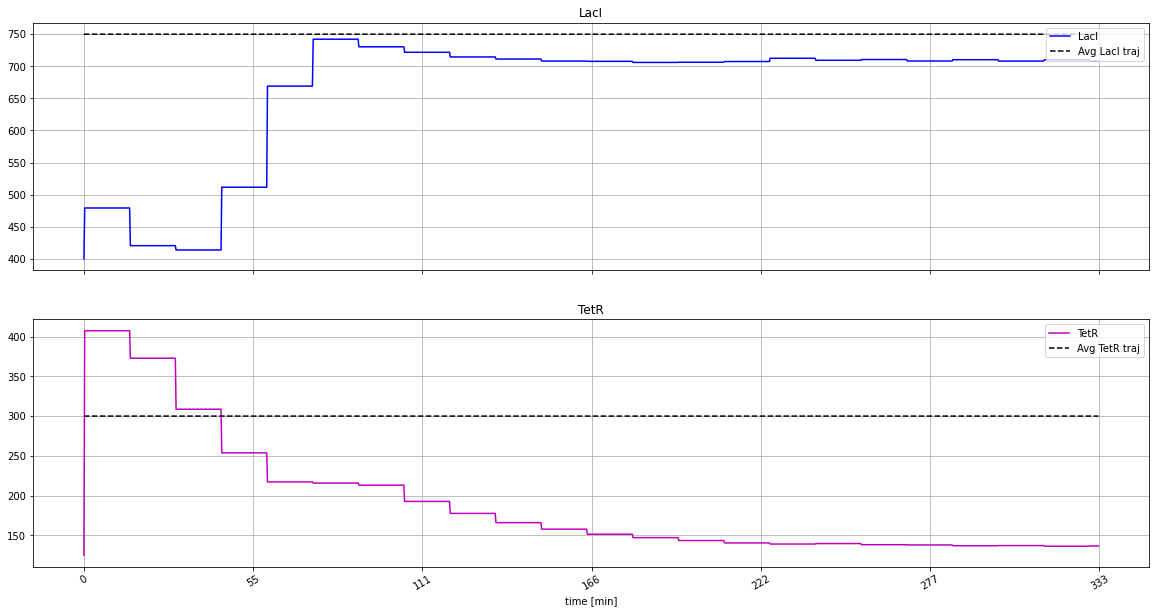

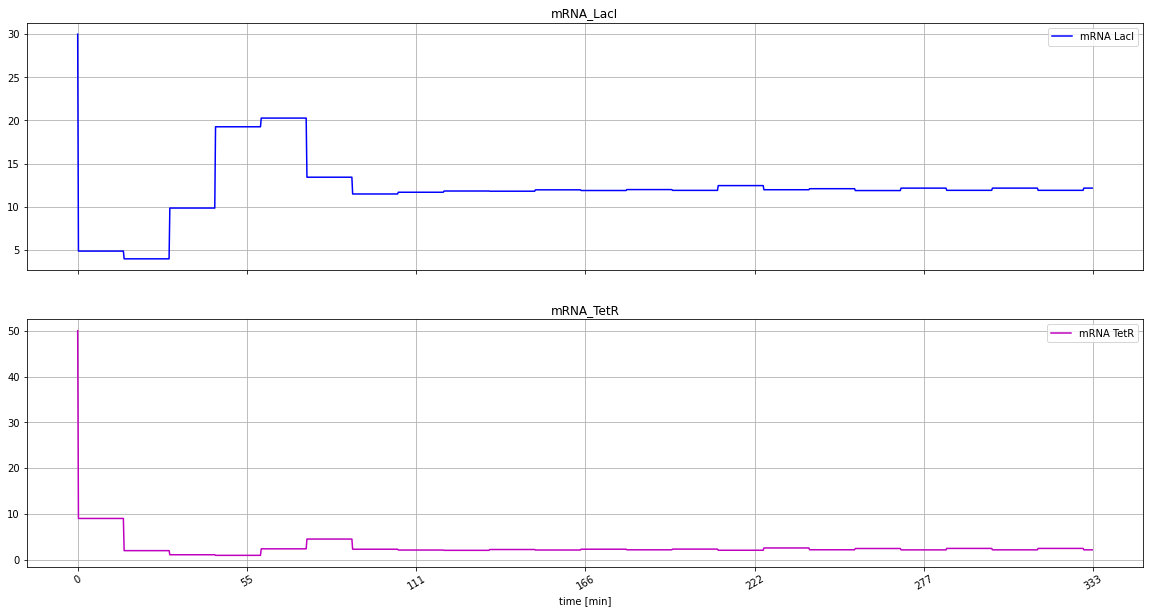

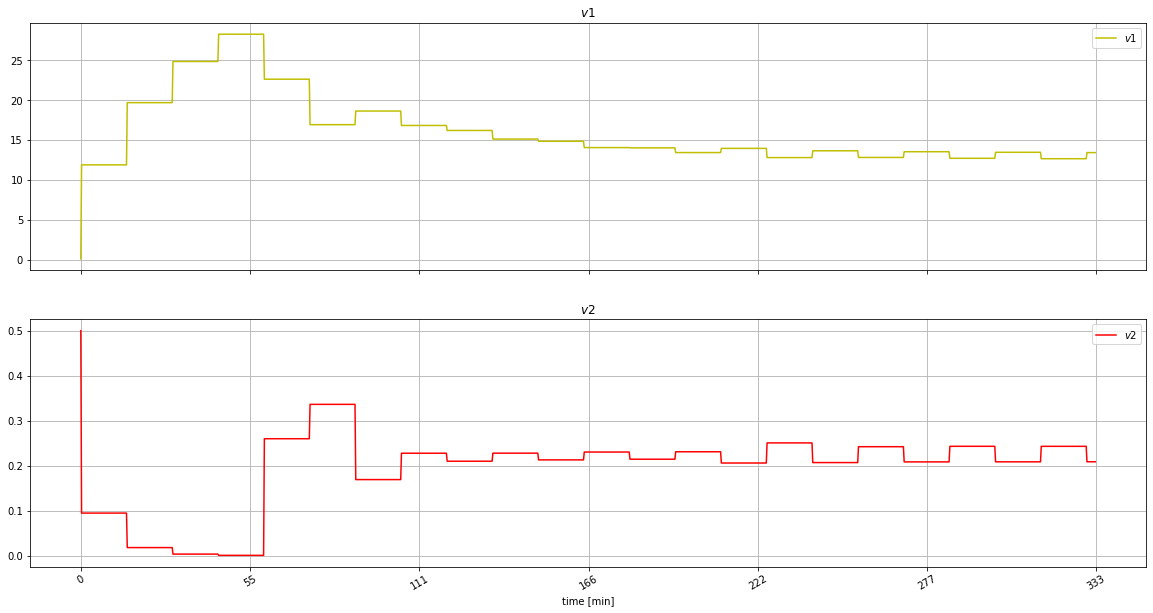

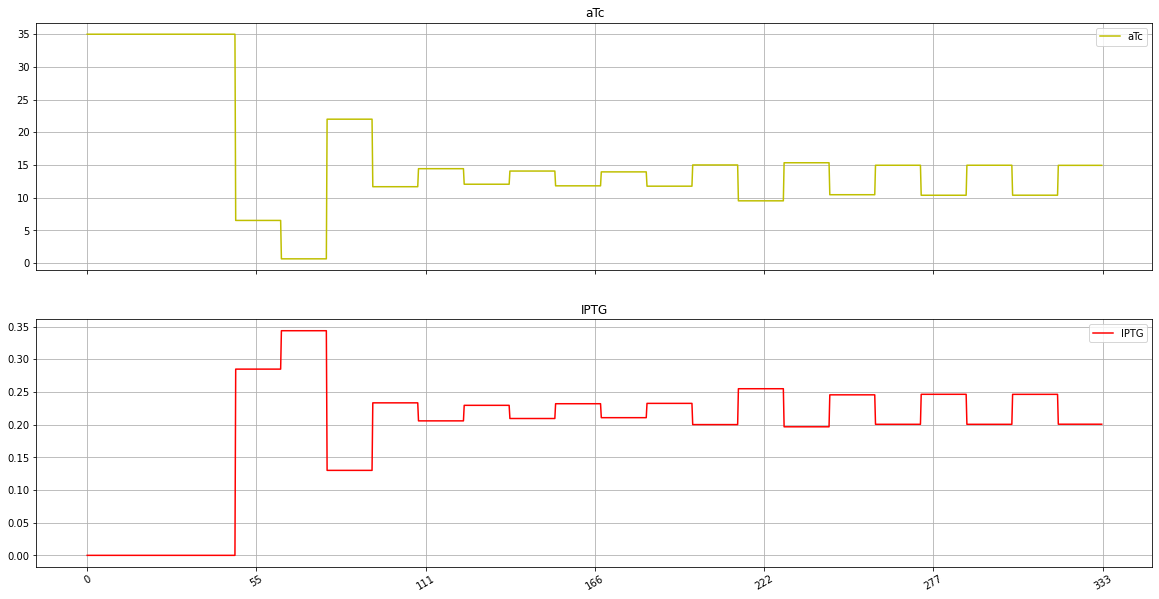

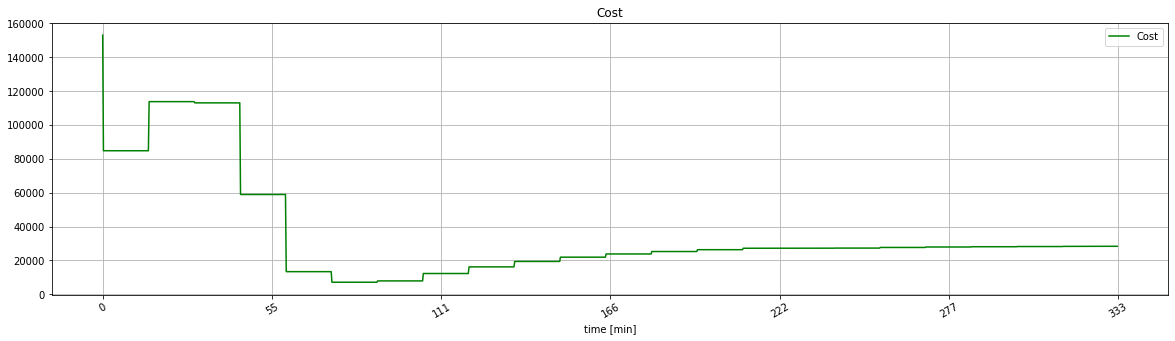

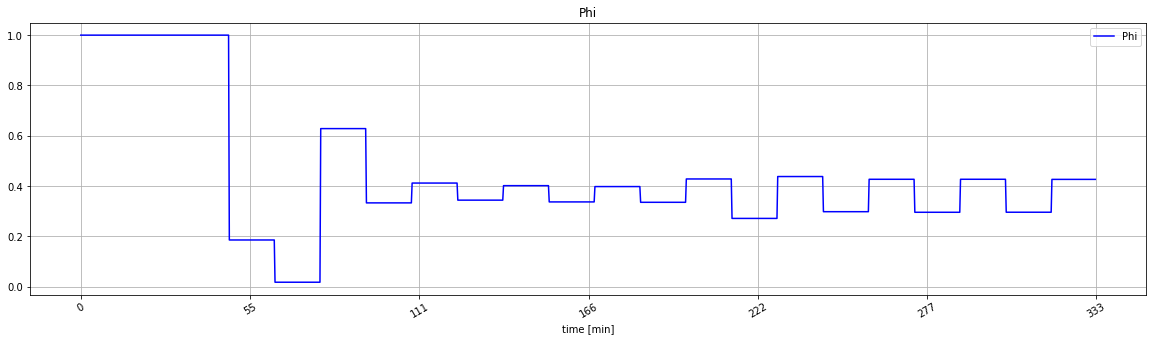

In [3]:
#print('------------------------------ PERFORMANCES METRICS ------------------------------')
#ISE, ITAE = compute_performance_metrics(data, total_time, t_step, avg_period)
#print('ISE:', format(ISE, '.2e'))
#print('ITAE:', format(ITAE, '.2e'))

print('------------------------------ PLOT RESULTS ------------------------------')
figures, lines = plot_results(data, total_time, avg_period)


## Results exportation

In [4]:
#export_results(data, 'deterministic', 'results', 'w')

## Plots animation

In [5]:
#animate_results('deterministic', 'proteins', update_protein, figures[0], (data, lines[0:6], np.arange(0, total_time, avg_period)), steps)
#animate_results('deterministic', 'mRNAs', update_mRNA, figures[1], (data, lines[6:8]), steps)
#animate_results('deterministic', 'internal_inducers', update_internal_inducers, figures[2], (data, lines[8:10]), steps)
#animate_results('deterministic', 'external_inducers', update_external_inducers, figures[3], (data, lines[10:12]), steps)
#animate_results('deterministic', 'cost', update_cost, figures[4], (data, lines[12:13]), steps)